In [1]:
%matplotlib inline

import numpy as np
import gensim, logging
import pandas as pnd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
WORD2VEC_VECTOR_FILE = "/home/knub/Repositories/master-thesis/data/GoogleNews-vectors-negative300.bin"
GLOVE_VECTOR_FILE = "/home/knub/Repositories/master-thesis/data/glove.6B.50d.txt"
# Three topics taken from original LDA paper by Blei et al.
topics = [["school", "students", "schools", "education", "teachers", "high", "public", "teacher", "elementary", "president"],
          ["million", "tax", "budget", "billion", "federal", "government", "spending", "state", "plan", "money"],
          ["film", "show", "music", "movie", "play", "musical", "actor", "opera", "theater", "actress"]]

#word2vec = gensim.models.Word2Vec.load_word2vec_format(GLOVE_VECTOR_FILE, binary=False)
word2vec = gensim.models.Word2Vec.load_word2vec_format(WORD2VEC_VECTOR_FILE, binary=True)
vector_size = word2vec.vector_size

In [25]:
vectors = [np.array([word2vec[word] for word in topic]) for topic in topics]
vectors = np.array(vectors)
vectors = np.reshape(vectors, (30, vector_size))
vectors = vectors * 100

In [26]:
# reduce dimensions
pca = PCA(n_components=50)
vectors = pca.fit_transform(vectors)

tsne = TSNE(n_components=2)
tsne_transform = tsne.fit_transform(vectors)

In [27]:
df = pnd.DataFrame(tsne_transform, columns=["x", "y"])
df["word"] = [word for topic in topics for word in topic]
df["topic"] = ["education"] * 10 + ["taxes"] * 10 + ["arts"] * 10

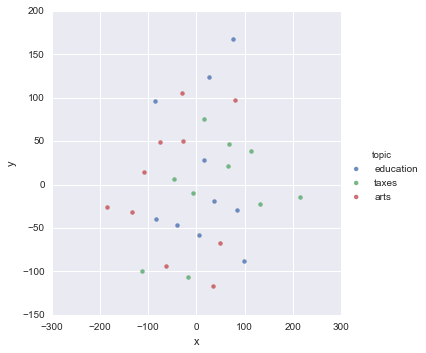

In [28]:
sns.lmplot("x", "y", data=df, fit_reg=False, hue="topic")